In [1]:
import straticor as scr
import matplotlib.pyplot as plt

plt.style.use("https://raw.githubusercontent.com/srnarvaez/my-mpl-themes/main/basic.mplstyle")

%matplotlib widget

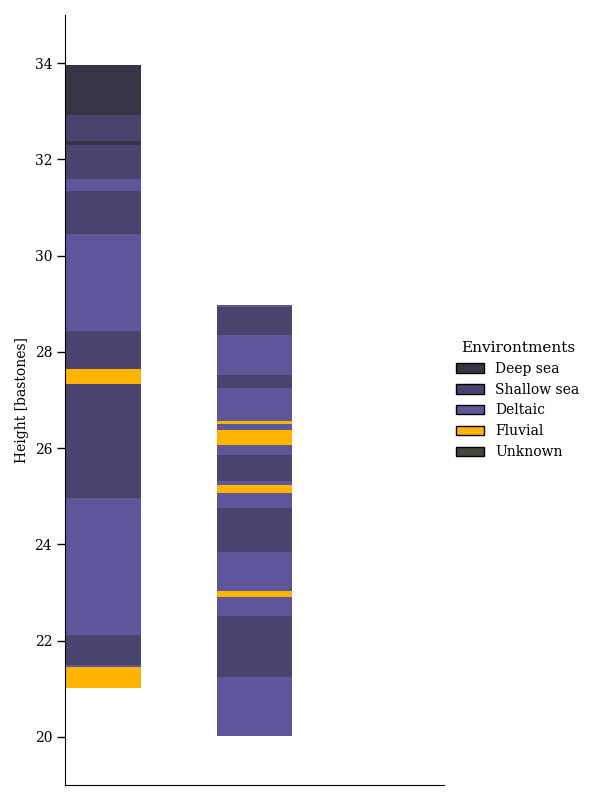

In [2]:
column = scr.load_column(path="../data/afloramiento/quebrada_santa_lucia/quebrada_santa_lucia.xlsx", fix=True)

col_1 = column.query("bottom <= 34 & bottom > 21").copy()
col_2 = column.query("bottom <= 21 & bottom > 12").copy()

col_2["bottom"] += 8

fig, ax = plt.subplots(1, figsize=(6, 8))

scr.plot_column(col_1, ax, 0.0, lw=0.0, legend=False)
scr.plot_column(col_2, ax, 0.4, lw=0.0, legend=False)

scr.add_legend(column, ax, loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set(xticks=[], ylabel="Height [bastones]", ylim=(19, 35))

plt.show()

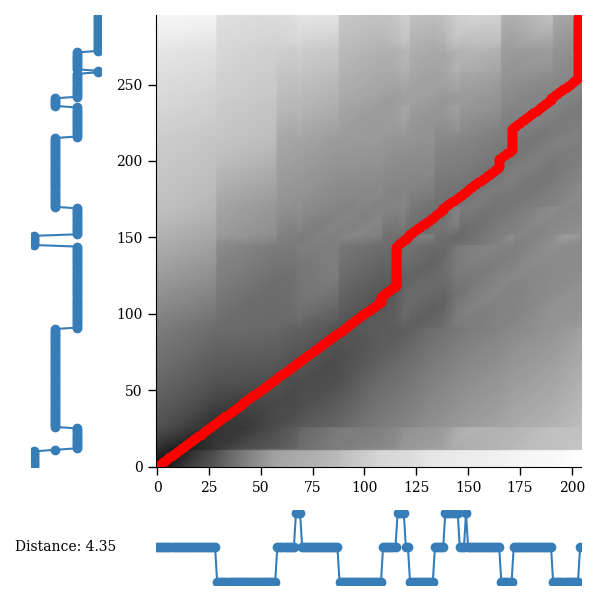

In [3]:
distance, cost_matrix = scr.dtw_log(col_1, col_2, alpha=0.05, cost_func="chrono", penalty=0.1)
col_3, best_path = scr.warp_log(col_1, col_2, cost_matrix)


fig = scr.plot_warpingpaths(col_1, col_2, paths=cost_matrix, best_path=best_path, distance=distance)
fig.set(figwidth=6, figheight=6)
fig.savefig("../images/test_quebrada_santa_lucia_subset_cost_matrix.png", dpi=300, bbox_inches="tight")

plt.show()

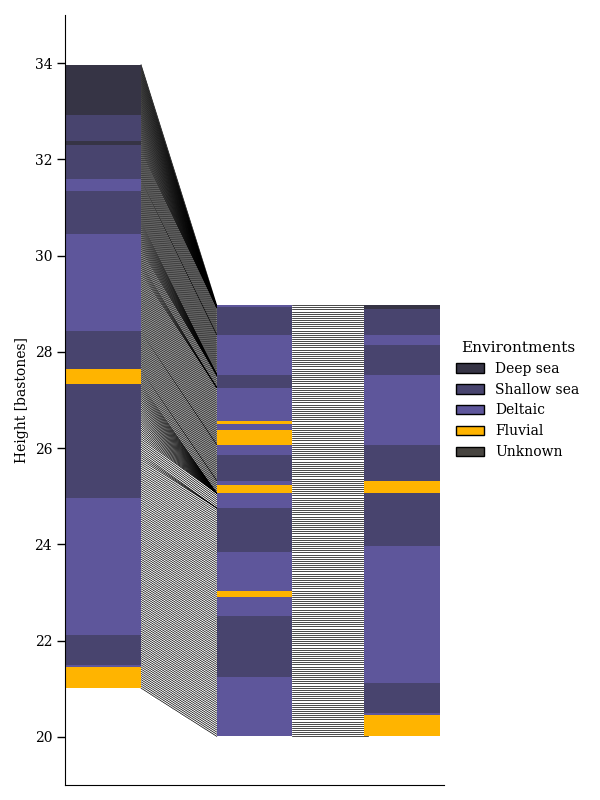

In [4]:
fig, ax = plt.subplots(1, figsize=(6, 8))

scr.plot_column(column=col_1, ax=ax, x_pos=0.0, width=0.2, lw=0.0, legend=False)
scr.plot_column(column=col_2, ax=ax, x_pos=0.4, width=0.2, lw=0.0, legend=False)
scr.plot_column(column=col_3, ax=ax, x_pos=0.79, width=0.2, lw=0.0, legend=False)

for idx, idy in best_path:
    plt.plot([0.2, 0.4], [col_1["bottom"].iloc[idx], col_2["bottom"].iloc[idy]], "-k", lw=0.5, zorder=-1)

for b in col_2["bottom"]:
    plt.plot([0.6, 0.8], [b, b], "-k", lw=0.5, zorder=-1)

scr.add_legend(column, ax, loc="center left", bbox_to_anchor=(1.0, 0.5))

ax.set(xticks=[], xlim=(0, 1), ylabel="Height [bastones]", ylim=(19, 35))

fig.savefig("../images/test_quebrada_santa_lucia_subset_correlation.png", dpi=300, bbox_inches="tight")

plt.show()